In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X

array([[ -9.62506077,  -3.6430989 ],
       [  1.53832383,  -3.08432077],
       [  2.29535535,  -1.72771047],
       ...,
       [ -9.45810648,  -1.50523493],
       [  2.38772886,  -3.11678887],
       [-10.69823666,  -4.44694677]])

In [4]:
y

array([0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2,
       0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1,

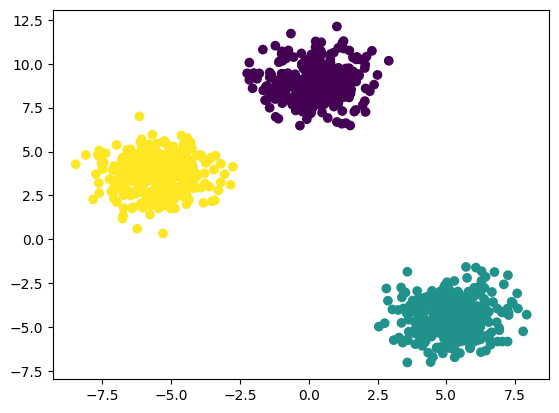

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.cluster import KMeans

In [11]:
##Elbow method to select the k value 
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [12]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 992.0708509383512,
 853.3219435918771,
 761.2659308864193,
 663.7521265354401,
 578.1990124596002,
 531.3846583938487]

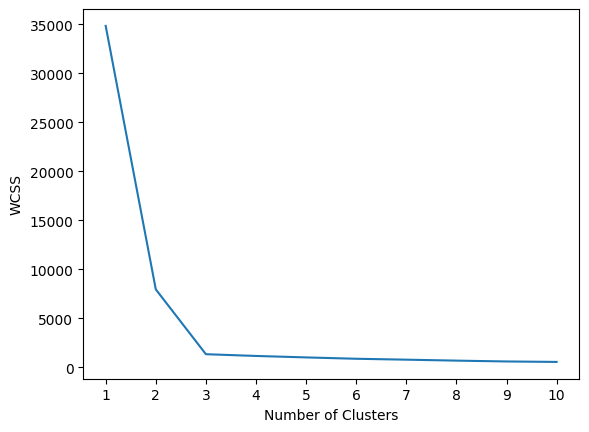

In [13]:
## plot the elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [16]:
y_labels=kmeans.fit_predict(X_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


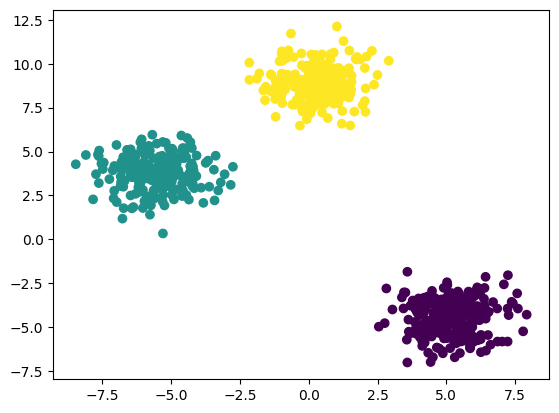

In [17]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [18]:
## knee locator
!pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [21]:
k1.elbow

3

In [22]:
## Silhouette Score
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [24]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33469201212077343,
 0.3319513293043729,
 0.33836271247719835,
 0.33994329261646156,
 0.34250746514849767]

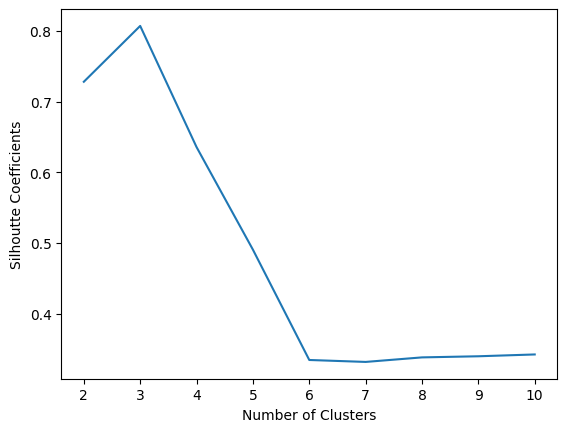

In [25]:
## plot silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhoutte Coefficients')
plt.show()